In [1]:
cd src

D:\Python\chess\src


In [2]:
import chess
from trainer import Trainer
from chessbot import ChessBot
from chessbot import model
import numpy as np
from pystockfish import Engine 

trainer = Trainer()
board = chess.Board()
gruefish = ChessBot()
gruefish2 = ChessBot()
stockfish = Engine(depth=20, param={"Threads": 6})
shitfish = Engine(depth=0, param={"Threads": 6})

Using TensorFlow backend.


0.340259611607


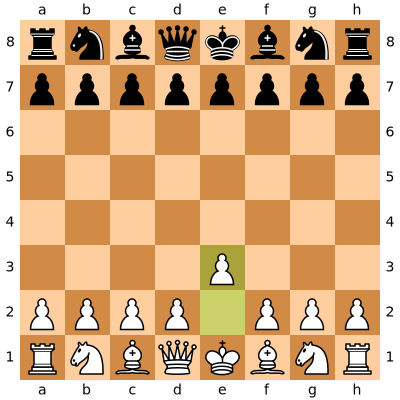

In [3]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(chessbot.best_move(board, eval=True, think_time=20))
    else:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(chessbot.best_move(board, eval=True, think_time=1))

board

In [101]:
board.pop()

Move.from_uci('c2b2')

In [6]:
%%timeit

print(chessbot.best_move(board, eval=True))

0.402747809887
g8f6
0.402747809887
g8f6
0.402747809887
g8f6
0.402747809887
g8f6
1 loop, best of 3: 5.51 s per loop


In [7]:
board.fen()

'R7/5k2/8/2p4p/P1p2P1P/2P5/1K3P2/8 b - - 18 47'

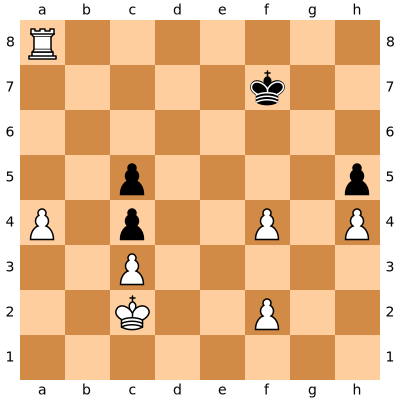

In [23]:
board.set_fen('R7/5k2/8/2p4p/P1p2P1P/2P5/2K2P2/8 w - - 17 47')
board

In [24]:
chessbot.best_move(board, eval=True)

0.999580183881


Move.from_uci('c2b2')

In [3]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        board.push(gruefish.best_move(board, eval=True, think_time=20))
        #board.push(trainer.best_move(board, filter=True))
    else:
        #board.push(trainer.best_move(board, filter=True))
        board.push(gruefish2.best_move(board, eval=True, think_time=5))
print(board.result(), len(board.move_stack))

0.322245
0.625157
0.31501853466
0.384626
0.452736198902
0.82188886404
0.52227422595
0.67464
0.152389287949
0.59756
0.336511135101
0.820161402225
0.221966
0.6371
0.5847889781
0.415211
0.91943
0.0526729
0.948201652616
0.00470912456512
0.979523
0.030779
0.997644
0.00122256
0.999968690965
2.52723693848e-05
0.999937
0.000117501
0.999968
4.56592e-05
0.99999
4.29153442383e-06
0.999996
4.05311584473e-06
0.999958881075
1.50203704834e-05
0.999975552391
2.04995e-05
0.999978
1.18705e-05
0.999996
3.57627868652e-06
0.999984
1.39337e-05
0.999970197825
2.70849e-05
0.99996886912
6.03231e-05
0.999881651849
7.06911087036e-05
0.999934
7.30123e-05
0.999853772155
0.000120779
0.999780638303
0.00100129842758
0.998999
0.00100129842758
0.999691
0.000604999
0.99966841517
0.000546514987946
0.999709060765
0.000162363052368
0.99968488107
0.000377672
0.99961747459
0.000193417072296
0.999791
0.000119126
0.999919567897
4.61027e-05
0.999826837025
0.000205545
0.999934341737
0.000166188
0.99994675388
9.13143157959e-05
0.

In [5]:
len(board.move_stack)

82

In [43]:
board.reset()

In [3]:
print(trainer.test_winrate())

0.0


In [3]:
board, won = trainer.play_vs_sunfish(True)

0-1 False 88


In [3]:
board, won = trainer.play_vs_stockfish(True, shitfish, think_time=40)

0-1 False 56


In [4]:
print(won)

False


In [4]:
temp_board = chess.Board()
move_num = 0

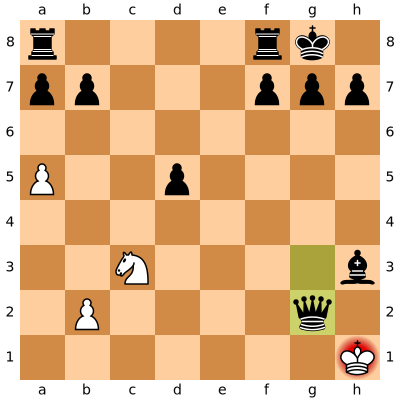

In [61]:
if len(board.move_stack) > move_num:
    temp_board.push(board.move_stack[move_num])
    move_num += 1

temp_board

In [566]:
#file = open("ficsgamesdb_2016_standard2000_nomovetimes_1435145.pgn")
file = open("ficsgamesdb_2016_chess_nomovetimes_1445486.pgn")

In [ ]:
game = chess.pgn.read_game(file)
board = game.end().board()

In [ ]:
game.headers['Result']

In [ ]:
trainer.train_from_match(board, game.headers['Result'])

In [1]:
cd src

D:\Python\chess\src


In [2]:
from model_twostate import model

Using TensorFlow backend.


(None, 2, 8, 8, 240)
(None, 30720)


In [ ]:
board.reset()
board.push(chess.Move.from_uci('c2c4'))
trainer.best_move(board, eval=True)


board.push(chess.Move.from_uci('g8f6'))
print(board)

In [ ]:
batch_x = np.zeros(shape=(1, 8, 8, 12), dtype=np.int8)
batch_x[0] = chessbot.board_to_matrix(board)
model.predict_proba(batch_x)

In [3]:
stockfish.setfenposition('rnb1k2r/ppq2ppp/4p3/3p4/3P4/2bBPN2/P1P2PPP/3Q1RK1 b kq - 1 11')
stockfish.bestmove()

info depth 1 seldepth 1 multipv 1 score cp 868 nodes 688 nps 344000 tbhits 0 time 2 pv e8g8
info depth 2 seldepth 2 multipv 1 score cp 875 nodes 957 nps 319000 tbhits 0 time 3 pv b8c6 a2a3
info depth 3 seldepth 3 multipv 1 score cp 911 nodes 1262 nps 420666 tbhits 0 time 3 pv b8c6 a2a3 e8g8
info depth 4 seldepth 4 multipv 1 score cp 922 nodes 1907 nps 635666 tbhits 0 time 3 pv b8c6 a2a3 e8g8 h2h3
info depth 5 seldepth 5 multipv 1 score cp 925 nodes 3015 nps 753750 tbhits 0 time 4 pv b8c6 a2a3 b7b6 g2g3 e8g8
info depth 6 seldepth 6 multipv 1 score cp 949 nodes 9024 nps 1289142 tbhits 0 time 7 pv e8g8 h2h4 b7b6 g2g3 b8c6 h4h5
info depth 7 seldepth 8 multipv 1 score cp 911 nodes 18544 nps 2060444 tbhits 0 time 9 pv e8g8 f3d2 b8c6 d2b1 c6b4 a2a3 b4d3
info depth 8 seldepth 10 multipv 1 score cp 908 nodes 26414 nps 2641400 tbhits 0 time 10 pv b8c6 f3d2 c6b4 d3b5 c8d7 b5d7 c7d7 a2a3 b4c6 h2h3
info depth 9 seldepth 14 multipv 1 score cp 918 nodes 48031 nps 4002583 tbhits 0 time 12 pv b8c6 f3d2

{'info': {'depth': 20,
  'multipv': 1,
  'nodes': 33382909,
  'nps': 11762829,
  'pv': 'e8g8 f3g5 h7h6 d1h5 b8c6 f2f4 f7f5 g5f3 c7a5 a2a3 a5a3 g2g4 f5g4 f3e5 c6e7 e5g6 e7f5 g6f8 a3f8 d3f5 e6f5 h5g6',
  'score': {'eval': 'cp', 'value': 976},
  'seldepth': 28,
  'tbhits': 0,
  'time': 2838},
 'move': 'e8g8',
 'ponder': 'f3g5'}